In [337]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats


In [ ]:
#uploading the dataset into the DataFrame

path = '/content/FAO.csv'
df= pd.read_csv(path,encoding = 'latin1',index_col=0,na_values=['??','???'])
df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area Abbreviation,,,,,,,,,,,,,,,,,,,,,
AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40


In [ ]:
#checking for null values
df.isnull().sum()

Area Code         0
Area              0
Item Code         0
Item              0
Element Code      0
               ... 
Y2009           104
Y2010           104
Y2011           104
Y2012             0
Y2013             0
Length: 62, dtype: int64

In [ ]:
#filling the null values with bfill method
df.fillna(method ='bfill',inplace =True)

In [ ]:
df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
               ..
Y2009           0
Y2010           0
Y2011           0
Y2012           0
Y2013           0
Length: 62, dtype: int64

In [551]:
# performing groupby wrt states
df1 = df.groupby('Area',as_index=False,sort=False).sum()
print(df1)

                                   Area  Area Code  Item Code  Element Code  \
0                           Afghanistan        166     224695        430576   
1                               Albania        369     331693        641941   
2                               Algeria        496     333506        645946   
3                                Angola        763     295092        566163   
4                   Antigua and Barbuda        936     315344        606541   
..                                  ...        ...        ...           ...   
169  Venezuela (Bolivarian Republic of)      30680     349693        676798   
170                            Viet Nam      25833     295394        566542   
171                               Yemen      29631     319987        616825   
172                              Zambia      30120     322962        621967   
173                            Zimbabwe      21901     325177        627109   

     latitude  longitude    Y1961    Y1962    Y1963

<BarContainer object of 5 artists>

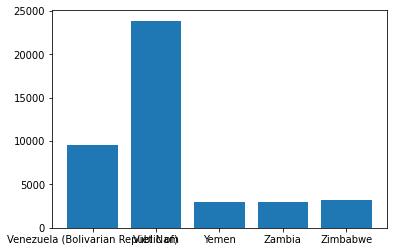

In [ ]:
plt.bar(df1["Area"].tail(5),df1['Y1961'].tail(5))

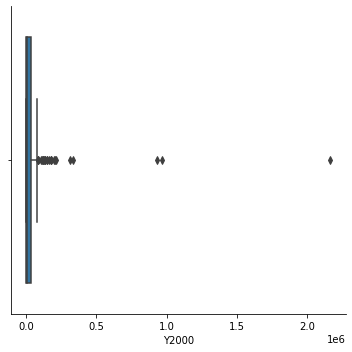

In [552]:
#checking for outliers in year 2000
sns.catplot(x= 'Y2000',kind='box',data=df1)

IQR 30593.5
NEW IQR 122374.0


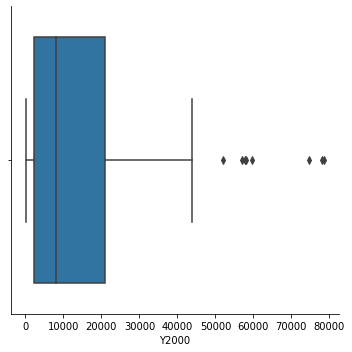

In [561]:
#reducing the outliers("dosent eliminate all outliers")
Q1=df1['Y2000'].quantile(.25)
Q3=df1['Y2000'].quantile(.75)
print('IQR',Q3-Q1)
IQR = Q3 - Q1
lb = Q1 - (1.5 * IQR)
ub = Q3 + (1.5 * IQR)
print('NEW IQR', ub-lb)

dfout=df1[(df1['Y2000']>lb) & (df1['Y2000']<ub)]
sns.catplot(x= 'Y2000',kind='box',data=dfout)

In [562]:
#performing groupby wrt element to find the total food and feed produced per year
df2 = df.groupby("Element",as_index=False,sort=False).sum()
print(df2)

  Element  Area Code  Item Code  Element Code   latitude  longitude  \
0    Food    2194111   47208904      90128976  337802.33  273029.96   
1    Feed     500166   10654677      21802429  101415.48   66187.34   

       Y1961      Y1962      Y1963      Y1964  ...      Y2004      Y2005  \
0  3054122.0  3139388.0  3185335.0  3262874.0  ...  8066135.0  8231769.0   
1  1038530.0  1072553.0  1115378.0  1137741.0  ...  2276096.0  2241437.0   

       Y2006      Y2007      Y2008      Y2009      Y2010      Y2011    Y2012  \
0  8394386.0  8616955.0  8811559.0  8935511.0  9147577.0  9374846.0  9616184   
1  2216567.0  2254057.0  2366429.0  2279812.0  2300927.0  2456284.0  2423161   

     Y2013  
0  9752737  
1  2608511  

[2 rows x 59 columns]


IQR 2675909.0
NEW IQR 10703636.0


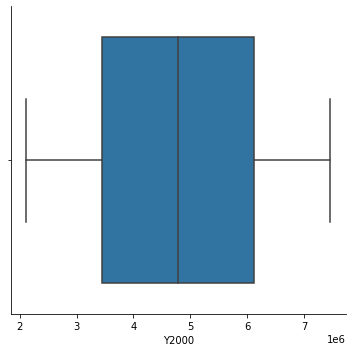

In [564]:
#checking for outliers
Q1=df2['Y2000'].quantile(.25)
Q3=df2['Y2000'].quantile(.75)
print('IQR',Q3-Q1)
IQR = Q3 - Q1
lb = Q1 - (1.5 * IQR)
ub = Q3 + (1.5 * IQR)
print('NEW IQR', ub-lb)

dfout=df2[(df2['Y2000']>lb) & (df2['Y2000']<ub)]
sns.catplot(x= 'Y2000',kind='box',data=dfout)

In [477]:
#creating x and x1
x =pd.DataFrame({"year":[1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]})
x

x1 =pd.DataFrame({"year":[1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]})
x1

,year
0,1961
1,1962
2,1963
3,1964
4,1965
5,1966
6,1967
7,1968
8,1969
9,1970


In [539]:
y = df2.loc[0,"Y1961":"Y2013"]
y.values

array([3054122.0, 3139388.0, 3185335.0, 3262874.0, 3474128.0, 3567802.0,
       3666335.0, 3669168.0, 3861216.0, 4024705.0, 4146316.0, 4238617.0,
       4429667.0, 4414910.0, 4447028.0, 4530111.0, 4696362.0, 4794477.0,
       4941831.0, 4991894.0, 5078409.0, 5258104.0, 5418208.0, 5693068.0,
       5883638.0, 6004451.0, 6126501.0, 6216327.0, 6432563.0, 6275581.0,
       6292106.0, 5967787.0, 6155579.0, 6318929.0, 6535134.0, 6675842.0,
       6838355.0, 7029941.0, 7268424.0, 7462473.0, 7583842.0, 7741305.0,
       7882044.0, 8066135.0, 8231769.0, 8394386.0, 8616955.0, 8811559.0,
       8935511.0, 9147577.0, 9374846.0, 9616184, 9752737], dtype=object)

In [540]:
y1 = df2.loc[1,"Y1961":"Y2013"]
y1.values

array([1038530.0, 1072553.0, 1115378.0, 1137741.0, 1210502.0, 1266768.0,
       1296442.0, 1335979.0, 1389814.0, 1428056.0, 1481336.0, 1519370.0,
       1569201.0, 1475474.0, 1504444.0, 1508587.0, 1568506.0, 1655502.0,
       1720248.0, 1658903.0, 1679579.0, 1745120.0, 1740578.0, 1888898.0,
       1914612.0, 1932508.0, 1970774.0, 1904864.0, 1965163.0, 1920658.0,
       1867817.0, 1996130.0, 2010673.0, 2007749.0, 1955949.0, 2025949.0,
       1996577.0, 1976856.0, 2007042.0, 2110655.0, 2153614.0, 2138809.0,
       2153157.0, 2276096.0, 2241437.0, 2216567.0, 2254057.0, 2366429.0,
       2279812.0, 2300927.0, 2456284.0, 2423161, 2608511], dtype=object)

In [541]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.25)
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size= 0.25)


In [542]:
#trainning the regression model
reg = LinearRegression()
model = reg.fit(x_train,y_train)

reg1 = LinearRegression()
model1 = reg.fit(x1_train,y1_train)

In [543]:
dt = pd.DataFrame()
dt['Years']=x
dt['food'] = y.values

dt1 = pd.DataFrame()
dt1['Years']=x1
dt1['feed'] = y1.values

<AxesSubplot:xlabel='Years', ylabel='food'>

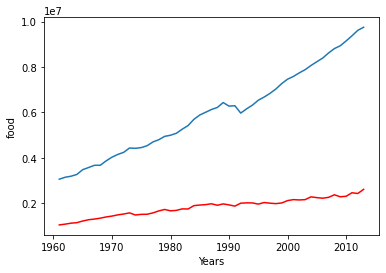

In [544]:
#realtion between feed (for animals) and food(for humans)
sns.lineplot(y='food',x='Years',data=dt)
sns.lineplot(y='feed',x='Years',data=dt1 ,color='red')

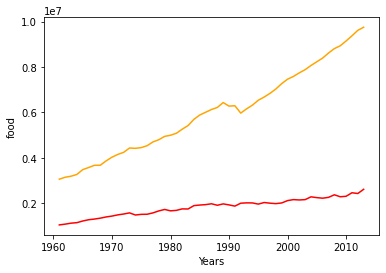

In [545]:
fig, ax = plt.subplots()
sns.lineplot(y="food", x="Years", color='orange', ci="sd", data=dt, ax=ax);
sns.lineplot(y="feed", x="Years", color='red', ci="sd", data=dt1, ax=ax);

In [546]:
y1 = df2.loc[1,"Y1961":"Y2013"]
y1.values

array([1038530.0, 1072553.0, 1115378.0, 1137741.0, 1210502.0, 1266768.0,
       1296442.0, 1335979.0, 1389814.0, 1428056.0, 1481336.0, 1519370.0,
       1569201.0, 1475474.0, 1504444.0, 1508587.0, 1568506.0, 1655502.0,
       1720248.0, 1658903.0, 1679579.0, 1745120.0, 1740578.0, 1888898.0,
       1914612.0, 1932508.0, 1970774.0, 1904864.0, 1965163.0, 1920658.0,
       1867817.0, 1996130.0, 2010673.0, 2007749.0, 1955949.0, 2025949.0,
       1996577.0, 1976856.0, 2007042.0, 2110655.0, 2153614.0, 2138809.0,
       2153157.0, 2276096.0, 2241437.0, 2216567.0, 2254057.0, 2366429.0,
       2279812.0, 2300927.0, 2456284.0, 2423161, 2608511], dtype=object)

TypeError: ignored

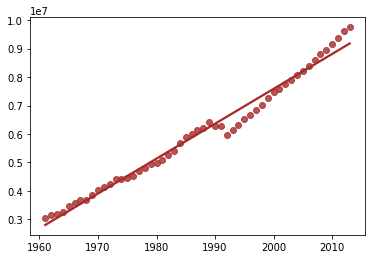

In [547]:
#regression line for food (can be used for food prediction in the future  note : the error doesnot affect the regression graph)
sns.regplot(y='food',x='Years',data=dt ,color='brown')

TypeError: ignored

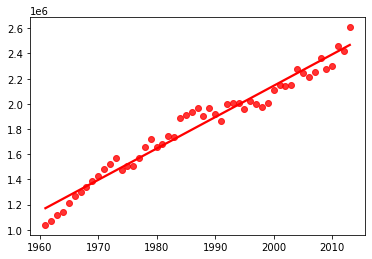

In [538]:
#regression line for feed (can be used for feed prediction in the future. note : the error doesnot affect the regression graph)
sns.regplot(y='feed',x='Years',data=dt1 ,color='red')

In [554]:
#predicting total food amount
y_pred = model.predict(x_test)
y_pred

array([1589718.60909566, 2227094.496434  , 1564223.57360213,
       2431054.78038228, 1921154.0705116 , 1819173.92853747,
       1360263.28965386, 2150609.3899534 , 1130807.97021206,
       1385758.3251474 , 2125114.35445987, 2456549.81587581,
       1513233.50261506, 1666203.71557627, 1283778.18317326,
       1768183.8575504 , 1946649.10600513, 1742688.82205687,
       1411253.36064093, 1691698.7510698 , 1615213.6445892 ,
       2201599.46094047, 1793678.89304394, 1258283.14767972,
       1462243.431628  , 2099619.31896634, 1640708.68008273,
       2278084.56742107, 1156303.0057056 , 1972144.14149867,
       1436748.39613447, 2303579.60291461, 1997639.1769922 ,
       2074124.28347281, 2380064.70939521, 2176104.42544693,
       1232788.11218619, 2405559.74488875, 1895659.03501807,
       2252589.53192754])

In [567]:
#predicting total feed amount

y1_pred = model1.predict(x1_test)
y1_pred

array([1870163.99952453, 2456549.81587581, 1487738.46712153,
       1946649.10600513, 2405559.74488875, 2380064.70939521,
       2099619.31896634, 2354569.67390168, 1385758.3251474 ,
       1589718.60909566, 1819173.92853747, 1972144.14149867,
       1360263.28965386, 2125114.35445987, 1232788.11218619,
       2074124.28347281, 1334768.25416033, 1513233.50261506,
       2303579.60291461, 1309273.21866679, 1181798.04119913,
       2023134.21248574, 1538728.53810859, 1615213.6445892 ,
       2150609.3899534 , 1742688.82205687, 1411253.36064093,
       2431054.78038228, 1844668.964031  , 1207293.07669266,
       1436748.39613447, 1793678.89304394, 1717193.78656333,
       2201599.46094047, 1768183.8575504 , 1462243.431628  ,
       1156303.0057056 , 1666203.71557627, 2176104.42544693,
       1921154.0705116 ])

In [556]:
#performance analysis for food
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 4300503.669687856
Mean squared error: 20745181682218.414
variance score: -4.85695863314598
Root Mean Squared Error: 4554687.879780393


In [557]:
#performance analysis for fee6d

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
print('Mean absolute error:', mean_absolute_error(y1_test, y1_pred))

print("Mean squared error:", mean_squared_error(y1_test, y1_pred))
print('variance score:',r2_score(y1_test, y1_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y1_test, y1_pred)))

Mean absolute error: 71784.58413072955
Mean squared error: 7620874350.802191
variance score: 0.948114083958358
Root Mean Squared Error: 87297.61938794317
